# <center> AE 8803: Homework 2 </center>

## <center> Problem 1 </center>

Check Overleaf Submission.

## <center> Problem 2 </center>

### Definining the State Space

In [1]:
import copy

class MazeGrid():
    """Class to define our state space and grid maze problem, custizable."""
    
    def __init__(self, grid_x_size, grid_y_size, obstacle_indices, start_state, goal_state):
        self.grid_x_size = grid_x_size;
        self.grid_y_size = grid_y_size;
        
        # Building the grid indices (without obstacles for now)
        self.grid_indices = [(x, y) for x in range(grid_x_size) for y in range(grid_y_size)]
        self.obstacle_indices = obstacle_indices;
        
        # Building the grid as a dictionary of indices to a text value (either "_" or a block if obstacle)
        self.build_grid()
        
        self.start_state = start_state
        self.goal_state = goal_state
        
        self.grid[start_state] = 'A'
        self.grid[goal_state] = 'B'
        
    def build_grid(self):
        """Function to build the grid once the dimensions and obstacles are defined"""
        self.grid = {}
        for entry in self.grid_indices:
            self.grid[entry] = '_'
            if entry in self.obstacle_indices:
                self.grid[entry] = '\u2588'
    
    def print_grid(self):
        """Function to display the grid. Not the prettiest, but does its job."""
        for y in range(self.grid_y_size - 1, -1, -1):
            for x in range(self.grid_x_size):
                coordinate = (x, y)
                if (x == self.grid_x_size - 1):
                    print(self.grid[coordinate])
                else:
                    print(self.grid[coordinate], end = ' ')
                    
    def is_goal_state(self, state):
        """Function to check if a given state is the goal state."""
        return state == self.goal_state
        
    def find_neighbors(self, state):
        """Function to find neighboring states.
        We don't define specific actions, so this is effectively our transition function.
        
        Args:
            state: The current state, (x, y), of which we need to returnvalid neighbors (not obstacles).
            
        Returns:
            neighbors: A list of accessible neighbors from state, this is a lit of (x, y) coordinates.
        """
        neighbor_transforms = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        neighbors = []
        for transform in neighbor_transforms:
            new_x = state[0] + transform[0]
            new_y = state[1] + transform[1]
            if ((0 <= new_x) and (new_x < self.grid_x_size) and 
                (0 <= new_y) and (new_y < self.grid_y_size) and 
                ((new_x, new_y) not in self.obstacle_indices)):
                neighbors.append((new_x, new_y))

        # NOTE: You could basically do all the above in one line with this list comprehension, but it wouldn't be very readable:
        # neighbors = [(curr_state[0] + transform[0], curr_state[1] + transform[1]) if (((curr_state[0] + transform[0]) >= 0) and ((curr_state[1] + transform[1]) >= 0) and ((curr_state[0] + transform[0]) < map_x_size) and ((curr_state[1] + transform[1]) < map_y_size) and (((curr_state[0] + transform[0]), (curr_state[1] + transform[1])) not in obstacle_indices)) else None for transform in neighbor_transforms]    
        
        return neighbors
    
    def print_path(self, states):
        """Function to add x's on the grid along the set of states defined by the input.
        Note that we don't check if any of those states are obstacles, it is assumed that the given path is valid.
        
        Args:
            states: A list of states, (x, y), travelled along the grid.
        """
        grid_copy = copy.deepcopy(self)
        
        for state in states:
            grid_copy.grid[state] = 'x'
    
        grid_copy.print_grid()

#### Testing our GridMaze

In [2]:
# First grid is the one given for the homework problem #
print('\n***** Grid 1 *****')
grid1 = MazeGrid(8, 7, [(0, 6), (1, 1), (1, 2), (3, 3), (3, 4), (4, 3), (5, 0), (5, 1), (5, 6), (7, 3)], (0, 0), (7, 5))
grid1.print_grid()

# Testing fetching neighbors:
print(grid1.find_neighbors((1, 0)))  # Should be [(0, 0), (2, 0)]
print(grid1.find_neighbors((3, 1)))  # Should be [(2, 1), (3, 0), (4, 1), (3, 2)]
print(grid1.find_neighbors((7, 0)))  # Should be [(6, 0), (7, 1)]


***** Grid 1 *****
█ _ _ _ _ █ _ _
_ _ _ _ _ _ _ B
_ _ _ █ _ _ _ _
_ _ _ █ █ _ _ █
_ █ _ _ _ _ _ _
_ █ _ _ _ █ _ _
A _ _ _ _ █ _ _
[(0, 0), (2, 0)]
[(2, 1), (3, 0), (4, 1), (3, 2)]
[(6, 0), (7, 1)]


In [3]:
# Second grid is more complex one for testing purposes #
print('\n***** Grid 2 *****')
obstacle_indices2 = [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (7, 5), (7, 4), (1, 1), (1, 2), (3, 3), 
                     (3, 4), (4, 3), (5, 0), (5, 1), (7, 3)]
grid2 = MazeGrid(15, 10, obstacle_indices2, (0, 0), (12, 5))
grid2.print_grid()

# Testing fetching neighbors:
print(grid2.find_neighbors((0, 2)))   # Should be [(0, 1), (0, 3)]
print(grid2.find_neighbors((6, 5)))   # Should be [(5, 5), (6, 4)]
print(grid2.find_neighbors((10, 8)))  # Should be [(9, 8), (10, 7), (11, 8), (10, 9)]


***** Grid 2 *****
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
█ █ █ █ █ █ █ █ _ _ _ _ _ _ _
_ _ _ _ _ _ _ █ _ _ _ _ B _ _
_ _ _ █ _ _ _ █ _ _ _ _ _ _ _
_ _ _ █ █ _ _ █ _ _ _ _ _ _ _
_ █ _ _ _ _ _ _ _ _ _ _ _ _ _
_ █ _ _ _ █ _ _ _ _ _ _ _ _ _
A _ _ _ _ █ _ _ _ _ _ _ _ _ _
[(0, 1), (0, 3)]
[(5, 5), (6, 4)]
[(9, 8), (10, 7), (11, 8), (10, 9)]


### Implementing DFS (for comparison)

In [4]:
def dfs(problem):
    """Depth-First Seach
    
    Args:
        problem: The problem we are running DFS on, includes start & goal states, get_neighbors, printing.
        
    Returns:
        expanded: If a path to the goal state of given problem is found, return the path, otherwise None is returned.
    """
    frontier = [problem.start_state]
    frontier_set = set({})    # Making a set of frontier because checking if state is in a set is faster than in a stack
    frontier_set.add(problem.start_state)
    explored = set({})
    
    expanded = []
    while (frontier):
        curr_state = frontier.pop()
        explored.add(curr_state)
        expanded.append(curr_state)
        
        neighbors = problem.find_neighbors(curr_state)
        for neighbor in neighbors:
            if (problem.is_goal_state(neighbor)):
                return expanded
            if ((neighbor not in explored) and (neighbor not in frontier_set)):
                frontier.append(neighbor)
                frontier_set.add(neighbor)
    
    return None

In [5]:
print('\n***** DFS on Grid 1 *****')
expanded_nodes1 = dfs(grid1)
grid1.print_path(expanded_nodes1)

print('\n***** DFS on Grid 2 *****')
expanded_nodes2 = dfs(grid2)
grid2.print_path(expanded_nodes2)


***** DFS on Grid 1 *****
█ x x x x █ _ _
x x _ _ x x x B
x _ _ █ _ _ _ _
x _ _ █ █ _ _ █
x █ _ _ _ _ _ _
x █ _ _ _ █ _ _
x _ _ _ _ █ _ _

***** DFS on Grid 2 *****
_ _ _ _ _ _ _ _ x x x x x x x
_ _ _ _ _ _ _ _ x _ _ _ _ _ x
_ _ _ _ _ _ _ _ x _ _ _ _ _ x
█ █ █ █ █ █ █ █ x _ _ _ _ _ x
x x x x x x x █ x _ _ _ B _ x
x _ _ █ _ _ x █ x _ _ _ x _ x
x _ _ █ █ _ x █ x _ _ _ x _ x
x █ _ _ _ _ x x x _ _ _ x _ x
x █ _ _ _ █ _ _ _ _ _ _ x _ x
x _ _ _ _ █ _ _ _ _ _ _ x x x


### Implementing BFS (for comparison)

In [6]:
from queue import Queue
    
def bfs(problem):
    """Depth-First Seach
    
    Args:
        problem: The problem we are running BFS on, includes start & goal states, get_neighbors, printing.
    """
    frontier = Queue()
    frontier.put(problem.start_state)
    frontier_set = set({})    # Making a set of frontier because checking if state is in a set is faster than in a stack
    frontier_set.add(problem.start_state)
    
    explored = set({})
    
    expanded = []
    while (frontier):
        curr_state = frontier.get()
        explored.add(curr_state)
        expanded.append(curr_state)
        
        neighbors = problem.find_neighbors(curr_state)
        for neighbor in neighbors:
            if (problem.is_goal_state(neighbor)):
                return expanded
            if ((neighbor not in explored) and (neighbor not in frontier_set)):
                frontier.put(neighbor)
                frontier_set.add(neighbor)
    
    return None

In [7]:
print('\n***** BFS on Grid 1 *****')
expanded_nodes1 = bfs(grid1)
grid1.print_path(expanded_nodes1)

print('\n***** BFS on Grid 2 *****')
expanded_nodes2 = bfs(grid2)
grid2.print_path(expanded_nodes2)


***** BFS on Grid 1 *****
█ x x x x █ _ _
x x x x x x _ B
x x x █ x x x x
x x x █ █ x x █
x █ x x x x x x
x █ x x x █ x x
x x x x x █ x x

***** BFS on Grid 2 *****
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ x _ _ _ _ _ _
█ █ █ █ █ █ █ █ x x _ _ _ _ _
x x x x x x x █ x x x _ B _ _
x x x █ x x x █ x x x x x _ _
x x x █ █ x x █ x x x x x x _
x █ x x x x x x x x x x x x x
x █ x x x █ x x x x x x x x _
x x x x x █ x x x x x x x _ _


### Implementing A*

In [8]:
from queue import PriorityQueue

def a_star(problem, heuristic):
    """A* Seach
    
    Args:
        problem: The problem we are running A* on, includes start & goal states, get_neighbors, printing.
    """
    frontier = PriorityQueue()
    frontier.put((heuristic(problem.start_state, problem.goal_state), id(problem.start_state), problem.start_state))
    explored = [] # set({})
    frontier_set = set({})    # Making a set of frontier because checking if state is in a set is faster than in a stack
    frontier_set.add(id(problem.start_state))  # Dictionaries are unhashable and can't be added to Hashset, but we can add id
    
    expanded = []
    while (frontier):
        queue_entry = frontier.get() 
        curr_state = queue_entry[2]
        explored.append(curr_state)
        expanded.append(curr_state)
        
        neighbors = problem.find_neighbors(curr_state)
        for neighbor in neighbors:
            if (problem.is_goal_state(neighbor)):
                return expanded
            if ((neighbor not in explored) and (id(neighbor) not in frontier_set)):
                frontier.put((heuristic(neighbor, problem.goal_state), id(neighbor), neighbor))
                frontier_set.add(id(neighbor))

#### Heuristics

In [9]:
import math

def manhattan_distance(point1, point2):
    """Computes the Manhattan distance between two points (x, y)."""
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def euclidean_distance(point1, point2):
    """Computes the Euclidean distance between two points (x, y)."""
    return math.sqrt((point1[0] - point2[0]) ** 2) + math.sqrt((point1[1] - point2[1]) ** 2)

#### Testing

In [15]:
print('\n***** A* on Grid 1 with Manhattan Distance*****')
expanded_nodes11 = a_star(grid1, manhattan_distance)
grid1.print_path(expanded_nodes11)

print('\n***** A* on Grid 1 with Euclidean Distance*****')
expanded_nodes12 = a_star(grid1, euclidean_distance)
grid1.print_path(expanded_nodes12)

print('\n***** A* on Grid 2 with Manhattan Distance*****')
expanded_nodes21 = a_star(grid2, manhattan_distance)
grid2.print_path(expanded_nodes21)

print('\n***** A* on Grid 2 with Euclidean Distance*****')
expanded_nodes22 = a_star(grid2, euclidean_distance)
grid2.print_path(expanded_nodes22)


***** A* on Grid 1 with Manhattan Distance*****
█ _ _ _ _ █ _ _
_ _ x x x x x B
x x x █ _ _ _ _
x _ _ █ █ _ _ █
x █ _ _ _ _ _ _
x █ _ _ _ █ _ _
x _ _ _ _ █ _ _

***** A* on Grid 1 with Euclidean Distance*****
█ _ _ _ _ █ _ _
_ x x x x x x B
x x _ █ _ _ _ _
x _ _ █ █ _ _ █
x █ _ _ _ _ _ _
x █ _ _ _ █ _ _
x _ _ _ _ █ _ _

***** A* on Grid 2 with Manhattan Distance*****
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
█ █ █ █ █ █ █ █ _ _ _ _ _ _ _
_ _ x x x x x █ _ _ _ _ B _ _
_ _ x █ x x x █ _ _ _ x x _ _
x x x █ █ x x █ _ _ x x _ _ _
x █ _ _ _ _ x x x x x _ _ _ _
x █ _ _ _ █ _ _ _ _ _ _ _ _ _
x _ _ _ _ █ _ _ _ _ _ _ _ _ _

***** A* on Grid 2 with Euclidean Distance*****
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _
█ █ █ █ █ █ █ █ _ _ _ _ _ _ _
_ _ x x x x x █ _ _ _ _ B _ _
_ x x █ _ x x █ _ _ _ _ x _ _
x x _ █ █ _ x █ _ x x x x _ _
x █ _ _ _ _ x x x x _ _ _ _ _
x █ _ _ _ █ _ _ _ _ _ _ _ _ _
x _ _ _ _ 

## <center> Problem 3 </center>

Check Overleaf submission.

## <center> Problem 4 </center>

### Defining the state space

In [208]:
class NPuzzle():
    """Class to define our state space and n-puzzle problem, custizable."""
    puzzle_x_size = 1
    puzzle_y_size = 1
    
    # STATE DEFINITION: Here, a state is (configuration, gap_index) where configuration is the puzzle arrangement and 
    # gap_index is the index of the empty block (having it separately makes things easier).
    start_state = ({}, (0, 0))
    goal_state = ({}, (0, 0))
    
    
    def __init__(self, puzzle_x_size, puzzle_y_size, start_state, goal_state):
        self.puzzle_x_size = puzzle_x_size
        self.puzzle_y_size = puzzle_y_size
        
        self.start_state = start_state
        self.goal_state = goal_state
    
    def print_puzzle(self, state):
        """Function to display the puzzle in the state passed in. Not the prettiest, but does its job."""
        configuration = state[0]
        for y in range(self.puzzle_y_size - 1, -1, -1):
            for x in range(self.puzzle_x_size):
                coordinate = (x, y)
                if (x == self.puzzle_x_size - 1):
                    print(configuration[coordinate])
                else:
                    print(configuration[coordinate], end = ' ')

                    
    def is_goal_state(self, state):
        """Function to check if a given state is the goal state."""
        return state == self.goal_state

    
    def find_neighbors(self, state):
        """Function to find neighboring states.
        We don't define specific actions, so this is effectively our transition function.
        
        Args:
            state: The current state, {...} of which we need to return  valid neighbors (other n-puzzle configurations).
            
        Returns:
            neighbors: A list of accessible neighbors from state, this is a list dictionaries, which are puzzle configs.
        """
        configuration = state[0]
        gap_index = state[1]
        
        transforms = [[-1, 0], [0, -1], [1, 0], [0, 1]]
        neighbors = []
        for transform in transforms:
            new_x = gap_index[0] + transform[0]
            new_y = gap_index[1] + transform[1]
            if (0 <= new_x and new_x < self.puzzle_x_size and
                0 <= new_y and new_y < self.puzzle_y_size):
                # This is the index of the piece we're moving into the empty space (gap_index)
                neighbor_index = (new_x, new_y)
                
                # We make a copy of the current configuration and switch the two numbers
                configuration_copy = configuration.copy()
                gap_symbol = configuration_copy[gap_index]
                configuration_copy[gap_index] = configuration_copy[neighbor_index]
                configuration_copy[neighbor_index] = gap_symbol
                
                # We append this new configuration to our set of neighbors, note that neighbor_index is now the gap index
                neighbors.append((configuration_copy, neighbor_index)) 

        return neighbors
    
#     def print_path(self, states):
#         """Function to print all the grids in the path defined by the set of states in the input.
        
#         Args:
#             states: A list of states, (configuration, gap_index) of how the gap was shifted.
#         """
#         for state in states:
#             self.print_puzzle(state)
#             print(" \/ ")

#### Testing our N-Puzzle

In [210]:
### Testing our NPuzzle ###
# Eight puzzle #
start_configuration1 = {(0, 2) : 5, (1, 2) : 4, (2, 2): '_',
                       (0, 1) : 6, (1, 1) : 1, (2, 1) : 8,
                       (0, 0) : 7, (1, 0) : 3, (2, 0) : 2}
start_gap_location1 = (2, 2)
start_state1 = (start_configuration1, start_gap_location1)

goal_configuration1 = {(0, 2) : '_', (1, 2) : 1, (2, 2): 2,
                       (0, 1) : 3,   (1, 1) : 4, (2, 1) : 5,
                       (0, 0) : 6,   (1, 0) : 7, (2, 0) : 8}
goal_gap_location1 = (0, 2)
goal_state1 = (goal_configuration1, goal_gap_location1)

eight_puzzle = NPuzzle(3, 3, start_state1, goal_state1)

print("***** 8-Puzzle Start State *****")
eight_puzzle.print_puzzle(start_state1)

print("***** 8-Puzzle Goal State *****")
eight_puzzle.print_puzzle(goal_state1)


# Fifteen puzzle #
# ... Will do at some point maybe ... #

***** 8-Puzzle Start State *****
5 4 _
6 1 8
7 3 2
***** 8-Puzzle Goal State *****
_ 1 2
3 4 5
6 7 8


In [211]:
# Testing neighbors of start state
print("***** Start State Neighbors *****")
start_state_neighbors = eight_puzzle.find_neighbors(start_state1)

for neighbor in start_state_neighbors:
    print('Gap Index:', neighbor[1])
    eight_puzzle.print_puzzle(neighbor)
    print()
    
# Testing neighbors of second neighbor of start state
print("***** Start State Neighbor #2's Neighbors *****")
neighbor_2_state = start_state_neighbors[1]
start_state_neighbors_neighbors = eight_puzzle.find_neighbors(neighbor_2_state)
for neighbor in start_state_neighbors_neighbors:
    print('Gap Index:', neighbor[1])
    eight_puzzle.print_puzzle(neighbor)
    print()

***** Start State Neighbors *****
Gap Index: (1, 2)
5 _ 4
6 1 8
7 3 2

Gap Index: (2, 1)
5 4 8
6 1 _
7 3 2

***** Start State Neighbor #2's Neighbors *****
Gap Index: (1, 1)
5 4 8
6 _ 1
7 3 2

Gap Index: (2, 0)
5 4 8
6 1 2
7 3 _

Gap Index: (2, 2)
5 4 _
6 1 8
7 3 2



### A*

#### Heuristics

In [212]:
import math

def count_num_misplaced_tiles(curr_state, goal_state):
    curr_configuration = curr_state[0]
    goal_configuration = goal_state[0]
    count = 0
    for index in curr_configuration:
        if (curr_configuration[index] != goal_configuration[index]) and (curr_configuration[index] != '_'):
            count += 1
    return count

def find_key_from_value(dictionary, search_value):
    """A very hacky method to find the key  corresponding to a given value in a dictionary.
    Which is not at all how a HashMap is supposed to be used. Actually it's literally the exact opposite.
    
    riperoni in peace
    """
    for index in dictionary:
        if dictionary[index] == search_value:
            return index
    

def count_sum_misplaced_distances(curr_state, goal_state):
    curr_configuration = curr_state[0]
    goal_configuration = goal_state[0]
    total_misplaced_distances = 0
    for index in curr_configuration:
        if (curr_configuration[index] != '_'):
            index_of_same_num_in_goal = find_key_from_value(goal_configuration, curr_configuration[index])
            current_misplaced_distance = manhattan_distance(index, index_of_same_num_in_goal)
            total_misplaced_distances += current_misplaced_distance
            
    return total_misplaced_distances

In [213]:
# Testing Heuristics #
print(count_num_misplaced_tiles(start_state1, goal_state1))       # Should be 8
print(count_num_misplaced_tiles(goal_state1, goal_state1))        # Should be 0

print(count_sum_misplaced_distances(start_state1, goal_state1))   # Should be 12
print(count_sum_misplaced_distances(goal_state1, goal_state1))    # Should be 0

8
0
12
0


#### Running A*

In [214]:
print('\n***** A* on 8-Puzzle with Number of Misplaced Tiles as Heuristic*****')
expanded_nodes11 = a_star(eight_puzzle, count_num_misplaced_tiles)
#eight_puzzle.print_path(expanded_nodes11)
print("This heuristic took", len(expanded_nodes11), "steps.")
for node in expanded_nodes11:
    eight_puzzle.print_puzzle(node)
    print('-----')


***** A* on 8-Puzzle with Number of Misplaced Tiles as Heuristic*****
This heuristic took 1076 steps.
5 4 _
6 1 8
7 3 2
-----
5 4 8
6 1 _
7 3 2
-----
5 4 8
6 1 2
7 3 _
-----
5 _ 4
6 1 8
7 3 2
-----
5 1 4
6 _ 8
7 3 2
-----
5 1 4
6 8 _
7 3 2
-----
5 1 4
6 8 2
7 3 _
-----
5 1 4
6 3 8
7 _ 2
-----
5 1 4
6 3 8
_ 7 2
-----
5 1 4
_ 3 8
6 7 2
-----
5 1 4
3 _ 8
6 7 2
-----
5 1 4
3 8 _
6 7 2
-----
5 1 4
3 8 2
6 7 _
-----
5 1 _
3 8 4
6 7 2
-----
_ 1 4
5 3 8
6 7 2
-----
5 _ 1
3 8 4
6 7 2
-----
_ 5 1
3 8 4
6 7 2
-----
5 8 1
3 _ 4
6 7 2
-----
5 8 1
3 4 _
6 7 2
-----
5 8 1
3 4 2
6 7 _
-----
5 8 _
3 4 1
6 7 2
-----
5 _ 8
3 4 1
6 7 2
-----
_ 5 8
3 4 1
6 7 2
-----
3 5 8
_ 4 1
6 7 2
-----
5 8 1
3 4 2
6 _ 7
-----
5 4 8
3 _ 1
6 7 2
-----
5 1 4
3 7 8
6 _ 2
-----
5 1 4
3 7 8
6 2 _
-----
5 1 4
3 7 _
6 2 8
-----
5 1 _
3 7 4
6 2 8
-----
5 1 4
3 _ 7
6 2 8
-----
5 1 4
3 2 7
6 _ 8
-----
5 1 4
3 2 7
_ 6 8
-----
5 _ 1
3 7 4
6 2 8
-----
5 _ 4
3 1 7
6 2 8
-----
_ 5 1
3 7 4
6 2 8
-----
5 1 4
_ 3 7
6 2 8
-----
_ 1 4
5 3

5 1 7
4 3 _
6 2 8
-----
5 1 7
4 _ 3
6 2 8
-----
5 1 7
_ 4 3
6 2 8
-----
_ 1 7
5 4 3
6 2 8
-----
5 1 7
6 4 3
_ 2 8
-----
5 1 7
6 4 3
2 _ 8
-----
5 1 7
4 2 3
6 _ 8
-----
1 _ 7
5 4 3
6 2 8
-----
1 7 _
5 4 3
6 2 8
-----
1 7 3
5 4 _
6 2 8
-----
6 1 4
3 5 8
7 _ 2
-----
6 1 4
3 5 8
_ 7 2
-----
6 1 4
3 _ 2
7 8 5
-----
_ 6 1
3 5 4
7 2 8
-----
1 3 4
6 _ 5
7 2 8
-----
4 1 5
6 7 3
_ 2 8
-----
3 1 5
2 4 _
7 8 6
-----
3 1 _
2 4 5
7 8 6
-----
4 1 5
2 _ 3
7 6 8
-----
_ 3 5
4 1 6
2 7 8
-----
4 3 5
_ 1 6
2 7 8
-----
4 3 1
6 7 5
_ 2 8
-----
4 5 _
6 1 3
2 7 8
-----
4 5 3
6 1 _
2 7 8
-----
4 3 _
6 5 1
2 7 8
-----
3 1 5
_ 2 6
7 4 8
-----
_ 1 5
3 2 6
7 4 8
-----
1 _ 5
3 2 6
7 4 8
-----
1 5 _
3 2 6
7 4 8
-----
1 5 6
3 2 _
7 4 8
-----
1 5 6
3 _ 2
7 4 8
-----
1 5 6
3 4 2
7 _ 8
-----
1 5 6
3 4 2
_ 7 8
-----
1 5 6
_ 4 2
3 7 8
-----
_ 5 6
1 4 2
3 7 8
-----
5 _ 6
1 4 2
3 7 8
-----
5 6 _
1 4 2
3 7 8
-----
5 6 2
1 4 _
3 7 8
-----
5 6 2
1 4 8
3 7 _
-----
5 6 2
1 _ 4
3 7 8
-----
5 6 2
_ 1 4
3 7 8
-----
5 6 2
3 1 4
_ 7 

-----
3 _ 1
8 2 5
6 7 4
-----
3 1 _
8 2 5
6 7 4
-----
3 1 5
8 2 _
6 7 4
-----
3 1 5
8 _ 2
6 7 4
-----
3 1 5
8 2 4
6 7 _
-----
3 1 5
_ 8 2
6 7 4
-----
_ 1 5
3 8 2
6 7 4
-----
1 _ 5
3 8 2
6 7 4
-----
1 8 5
3 _ 2
6 7 4
-----
1 8 5
3 2 _
6 7 4
-----
1 8 _
3 2 5
6 7 4
-----
1 _ 8
3 2 5
6 7 4
-----
_ 1 8
3 2 5
6 7 4
-----
3 1 8
_ 2 5
6 7 4
-----
3 1 8
2 _ 5
6 7 4
-----
1 2 8
3 _ 5
6 7 4
-----
3 1 8
6 2 5
_ 7 4
-----
1 2 8
3 7 5
6 _ 4
-----
1 8 5
3 2 4
6 7 _
-----
1 2 8
3 5 _
6 7 4
-----
1 2 8
_ 3 5
6 7 4
-----
_ 2 8
1 3 5
6 7 4
-----
2 _ 8
1 3 5
6 7 4
-----
1 2 8
3 5 4
6 7 _
-----
3 1 8
2 5 _
6 7 4
-----
3 1 _
2 5 8
6 7 4
-----
3 1 8
2 5 4
6 7 _
-----
2 8 _
1 3 5
6 7 4
-----
1 2 8
3 7 5
6 4 _
-----
3 _ 8
2 1 5
6 7 4
-----
3 8 _
2 1 5
6 7 4
-----
_ 3 8
2 1 5
6 7 4
-----
2 3 8
_ 1 5
6 7 4
-----
2 3 8
1 _ 5
6 7 4
-----
2 3 8
1 _ 5
6 7 4
-----
3 1 8
2 7 5
6 _ 4
-----
3 1 8
2 7 5
6 4 _
-----
1 2 _
3 5 8
6 7 4
-----
1 _ 2
3 5 8
6 7 4
-----
_ 1 2
3 5 8
6 7 4
-----
1 5 2
3 _ 8
6 7 4
-----
3 1 2
_ 5 

In [215]:
print('\n***** A* on 8-Puzzle with Total Piece Misalignments as Heuristic*****')
expanded_nodes11 = a_star(eight_puzzle, count_sum_misplaced_distances)
#eight_puzzle.print_path(expanded_nodes11)
print("This heuristic took", len(expanded_nodes11), "steps.")
for node in expanded_nodes11:
    eight_puzzle.print_puzzle(node)
    print('-----')


***** A* on 8-Puzzle with Total Piece Misalignments as Heuristic*****
This heuristic took 341 steps.
5 4 _
6 1 8
7 3 2
-----
5 _ 4
6 1 8
7 3 2
-----
5 1 4
6 _ 8
7 3 2
-----
5 1 4
6 3 8
7 _ 2
-----
5 1 4
6 3 8
_ 7 2
-----
5 1 4
_ 3 8
6 7 2
-----
_ 1 4
5 3 8
6 7 2
-----
5 1 4
3 _ 8
6 7 2
-----
5 1 4
3 7 8
6 _ 2
-----
5 1 4
3 8 _
6 7 2
-----
5 1 4
3 8 2
6 7 _
-----
5 1 _
3 8 4
6 7 2
-----
5 _ 1
3 8 4
6 7 2
-----
_ 5 1
3 8 4
6 7 2
-----
3 5 1
_ 8 4
6 7 2
-----
5 1 4
3 8 2
6 _ 7
-----
5 1 4
3 _ 2
6 8 7
-----
1 _ 4
5 3 8
6 7 2
-----
1 4 _
5 3 8
6 7 2
-----
1 4 8
5 3 _
6 7 2
-----
1 4 8
5 3 2
6 7 _
-----
1 4 8
5 3 2
6 _ 7
-----
5 _ 4
3 1 8
6 7 2
-----
_ 5 4
3 1 8
6 7 2
-----
5 4 _
3 1 8
6 7 2
-----
3 5 4
_ 1 8
6 7 2
-----
5 4 8
3 1 _
6 7 2
-----
5 4 8
3 1 2
6 7 _
-----
5 4 8
3 1 2
6 _ 7
-----
5 1 4
_ 3 2
6 8 7
-----
_ 1 4
5 3 2
6 8 7
-----
1 _ 4
5 3 2
6 8 7
-----
1 4 _
5 3 2
6 8 7
-----
1 4 2
5 3 _
6 8 7
-----
1 4 2
5 _ 3
6 8 7
-----
1 4 2
_ 5 3
6 8 7
-----
1 _ 2
5 4 3
6 8 7
-----
_ 1 2
5 4 

#### Computing average states expanded by A* with each heuristic

In [18]:
print('\n***** Average Number of States Expanded Using A* on 8-Puzzle with Number of Misplaced Tiles as Heuristic (h1)*****')
states_expanded_h1 = []
for i in range(100):
    if (i % 10) == 0:
        print('Running iteration: ', i)
    expanded_nodes = a_star(eight_puzzle, count_num_misplaced_tiles)
    states_expanded_h1.append(len(expanded_nodes))
    
print("This heuristic expanded an average of ", sum(states_expanded_h1) / len(states_expanded_h1), "states.")


***** Average Number of States Expanded Using A* on 8-Puzzle with Number of Misplaced Tiles as Heuristic (h1)*****
Running iteration:  0
Running iteration:  10
Running iteration:  20
Running iteration:  30
Running iteration:  40
Running iteration:  50
Running iteration:  60
Running iteration:  70
Running iteration:  80
Running iteration:  90
This heuristic expanded an average of  838.76 states.


In [217]:
print('\n***** Average Number of States Expanded Using A* on 8-Puzzle with Total Piece Misalignments as Heuristic*****')
states_expanded_2 = []
for i in range(100):
    if (i % 10) == 0:
        print('Running iteration: ', i)
    expanded_nodes = a_star(eight_puzzle, count_sum_misplaced_distances)
    states_expanded_2.append(len(expanded_nodes))
    
print("This heuristic expanded an average of ", sum(states_expanded_2) / len(states_expanded_2), "states.")


***** Average Number of States Expanded Using A* on 8-Puzzle with Total Piece Misalignments as Heuristic*****
Running iteration:  0
Running iteration:  10
Running iteration:  20
Running iteration:  30
Running iteration:  40
Running iteration:  50
Running iteration:  60
Running iteration:  70
Running iteration:  80
Running iteration:  90
This heuristic expanded an average of  299.59 states.


## <center> Problem 5 </center>

In [218]:
# Shorthands to identify shapes
RED = 'square'
BLUE = 'house'
YELLOW = 'triangle_yellow'
PURPLE = 'triangle_purple'
GREEN = 'triangle_green'
ORANGE = 'triangle_orange'

NOTE: The cell below is in serious debugging phase, but the idea is there, and I sure as heck tried. Might come back and debug this someday, fun  problem.

In [262]:
import math
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

class ColorGeometry():
    """Class to define our state space and color geometry problem, custizable."""
    
    # STATE DEFINITION: Here, we represent a state as a tuple (vertices, shapes_available)


    # Note: We can have the starting state be any single state provided that all shapes are part of the solution, which is
    #       the case here.
    start_state = ([], {})
    
    def __init__(self):
        self.shapes = {'square' : ([(0, 0), (0, 4), (4, 4), (4, 0)], 'red'),
                       'house' : ([(0, 0), (0, 2 * math.sqrt(2)), (math.sqrt(2), 3 * math.sqrt(2)), (2 * math.sqrt(2), 2 * math.sqrt(2)), (2 * math.sqrt(2), 0)], 'blue'),
                       'triangle_yellow' : ([(0, 0), (math.sqrt(2), math.sqrt(2)), (2 * math.sqrt(2), 0)], 'yellow'),
                       'triangle_purple' : ([(0, 0), (2, 2), (4, 0)], 'purple'),
                       'triangle_green'  : ([(0, 0), (2 * math.sqrt(2), 2 * math.sqrt(2)), (4 * math.sqrt(2), 0)], 'green'),
                       'triangle_orange' : ([(0, 0), (2 * math.sqrt(2), 2 * math.sqrt(2)), (4 * math.sqrt(2), 0)], 'orange')
             }
        
        self.start_state = (self.shapes[BLUE][0], {BLUE, YELLOW, PURPLE, GREEN, ORANGE})


    def is_goal_state(self, state):
        """Function to check if a given state is the goal state."""
        # TODO(capuanomat): Tough
        # vertices = state[0]
        # return vertices == self.goal_state
        pass

    
    def print_state(self, state):
        """Function to display the shape. Quite pretty (subjective)."""
        # Extracting the shape and color information
        coordinates = state[0]
        color = state[1]
        x = [x for (x, _) in coordinates]
        y = [y for (_, y) in coordinates]

        # Creating Figure and Specifying parameters
        plt.figure(figsize=(8, 8))
        plt.axis('equal')

        # Plotthing the geometry and displaying the plot
        plt.fill(x, y, color)
        plt.show()


    def find_angle(self, v1, v2, v3):
        """Function to find the angle between three points in Euclidean space, with v2 at junction"""
        v1v2 = np.array(v1) - np.array(v2)
        v3v2 = np.array(v3) - np.array(v2)

        cosine_angle = np.dot(v1v2, v3v2) / (np.linalg.norm(v1v2) * np.linalg.norm(v3v2))
        angle = np.arccos(cosine_angle)
        
        return angle

    
    def rot_matrix(self, angle):
        """Function to return the 2D rotation matrix given an angle *in radians*."""
        return np.array([[math.cos(angle), math.sin(angle)],
                         [-math.sin(angle), math.cos(angle)]])
    
    
    def rotate_shape_if_valid(self, added_vertices, rot, current_vertices):
        """Function to apply a rotation matrix to a given geometry, and then check if it intersects with the existing shape."""
        rotated = []
        for vertex in added_vertices:
            rotated_vertex = np.matmul(rot, vertex)
            rotated.append(tuple(rotated_vertex))
            
        curr_polygon = Polygon(current_vertices)
        rotated_polygon = Polygon(rotated)
        
        # .touches checks that the polygons touch at at least one point but that the interiors do not intersect
        if curr_polygon.touches(rotated_polygon):
            return rotated
        
        return None
    
    def combine_geometries(self, vertices, rotated_shape):
        """Function to combine two polygons.
        The key challenge here is making sure that neighboring vertices remain next to each other.
        
        This approach actually does so INCORRECTLY, depending on when we find the matching vertex
        """
        new_vertices = []
        
        for vertex in vertices:
            if (vertex in rotated_shape):
                for rot_vertex in rotated_shape:
                    new_vertices.append(rot_vertex)
            else:
                new_vertices.append(vertex)
        
        return new_vertices
    
    
    def find_neighbors(self, state):
        """Function to find neighboring states.
        We don't define specific actions, so this is effectively our transition function.
        
        Args:
            state: The current state, a list of vertices of the current shape.
            
        Returns:
            neighbors: A list of lists of vertices of neighboring shapes.
        """
        vertices = state[0]
        shapes_available = state[1]
        
        neighbors = []
        
        for shape in shapes_available:
            # The indices of the shape we are adding are:
            added_shape = self.shapes[shape][0].copy()
            num_added_vertices = len(added_shape)
            
            # The remaining shapes we could use to add to the geometry (in later steps):
            remaining_shapes_available = shapes_available.copy()
            remaining_shapes_available.remove(shape)
            
            for i in range(len(vertices)):
                # First, find the current vertex and the vertices neighboring this vertex
                vertex1 = vertices[i]
                vertex1_prev = vertices[(i - 1) % len(vertices)]
                vertex1_next = vertices[(i + 1) % len(vertices)]
                
                # Second, loop through all vertices of the shape we are adding and see how they can be aligned
                for j in range(num_added_vertices):
                    vertex2 = added_shape[i]
                    vertex2_prev = added_shape[(j - 1) % num_added_vertices]
                    vertex2_next = added_shape[(j + 1) % num_added_vertices]
                                
                    # Now, we have to align the two primary vertices we are focusing on, such that we only have to rotate to align edges
                    xdiff = vertex1[0] - vertex2[0]
                    ydiff = vertex1[1] - vertex2[1]
                    for k in range(num_added_vertices):
                        added_shape[k] = (added_shape[k][0] + xdiff, added_shape[k][1] + ydiff)
                    
                    # There are four pairs of vertices to find the angle for and try aligning (two will fail due to 
                    # intersections). Note that at this point, vertex1 = vertex2 since we just aligned them.
                    # Case 1: v1n, v1, v2n
                    theta1 = self.find_angle(vertex1_next, vertex1, vertex2_next)
                    R1 = self.rot_matrix(theta1)
                    rotated_shape1 = self.rotate_shape_if_valid(added_shape, R1, vertices)
                    print(rotated_shape1)
                    
                    """
                    # Case 2: v1n, v1, v2p
                    print('--------------------')
                    print('v1n : ', vertex1_next)
                    print('v1: ', vertex1)
                    print('v2p : ', vertex2_prev)
                    theta2 = self.find_angle(vertex1_next, vertex1, vertex2_prev)
                    R2 = self.rot_matrix(theta2)
                    print('theta : ', theta2)
                    print('Added Shape: ', added_shape)
                    print('R2 : ', R2)
                    print('Vertices : ', vertices)
                    rotated_shape2 = self.rotate_shape_if_valid(added_shape, R2, vertices)
                    
                    # Case 3: v1p, v1, v2n
                    theta3 = self.find_angle(vertex1_prev, vertex1, vertex2_next)
                    R3 = self.rot_matrix(theta3)
                    rotated_shape3 = self.rotate_shape_if_valid(added_shape, R3, vertices)
                    
                    # Case 4: v1p, v1, v2p
                    theta4 = self.find_angle(vertex1_prev, vertex1, vertex2_prev)
                    R4 = self.rot_matrix(theta4)
                    rotated_shape4 = self.rotate_shape_if_valid(added_shape, R4, vertices)
                    
                    rotated_shapes = [rotated_shape1, rotated_shape2, rotated_shape3, rotated_shape4]
                    """
                    rotated_shapes = [rotated_shape1]
                    # Finally, for the valid rotated shapes (do not overlap with the current geometry) we combine them with it
                    for rotated_shape in rotated_shapes:
                        if (rotated_shape):
                            new_vertices = self.combine_geometries(vertices, rotated_shape)
                            neighbors.append((new_vertices, remaining_shapes_available))
                            return neighbors
                        
        return neighbors
    

None
[(0.0, 0.0), (2.8284271247461903, -2.8284271247461903), (3.4638242249419736e-16, -5.656854249492381)]
[([(0.0, 0.0), (2.8284271247461903, -2.8284271247461903), (3.4638242249419736e-16, -5.656854249492381), (0, 2.8284271247461903), (1.4142135623730951, 4.242640687119286), (2.8284271247461903, 2.8284271247461903), (2.8284271247461903, 0)], {'triangle_purple', 'triangle_yellow', 'house', 'triangle_orange'})]


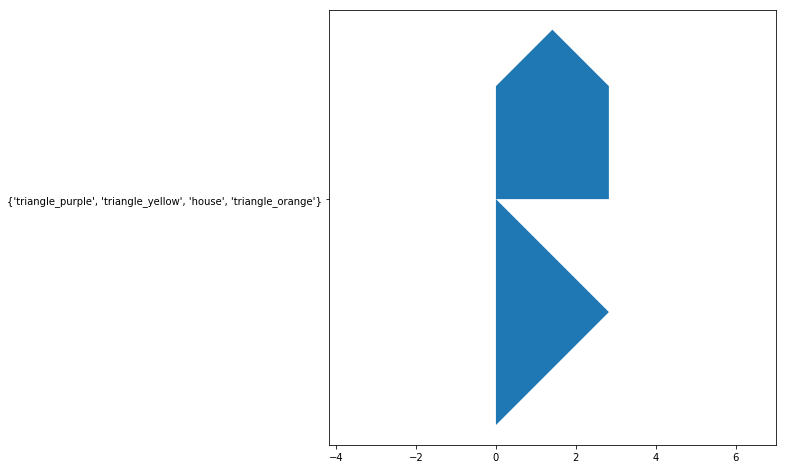

In [267]:
# Testing printing of geometries
problem = ColorGeometry()
neighbors = problem.find_neighbors(problem.start_state)
print('==============')
print(neighbors)
problem.print_state(neighbors[0])

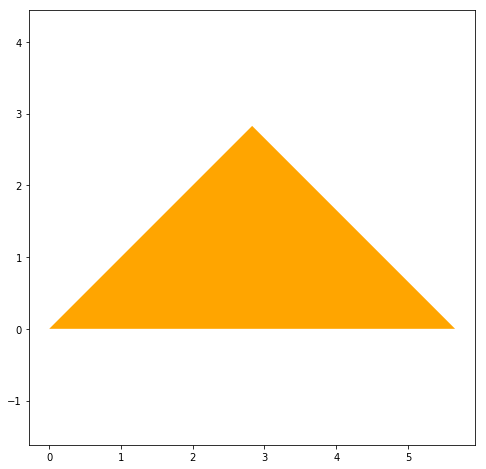

In [97]:
# Testing printing of geometries
problem = ColorGeometry()
problem.print_state(problem.shapes[ORANGE])

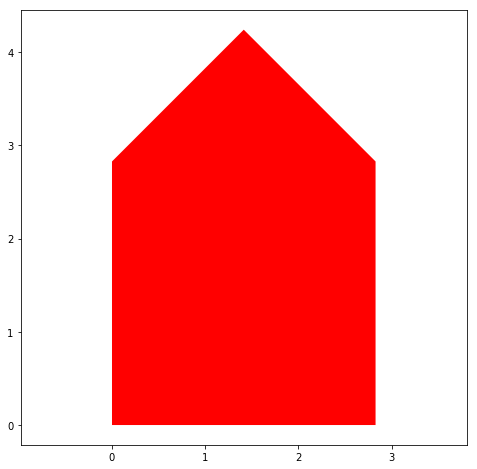

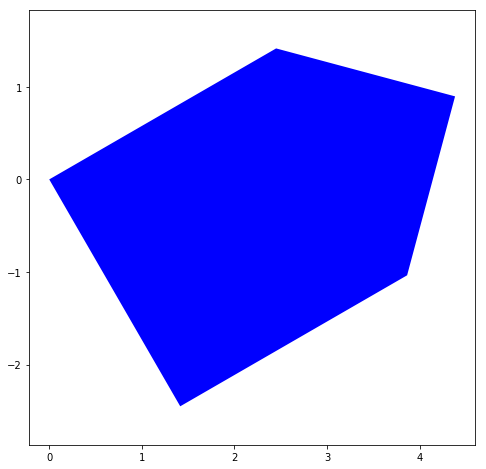

In [223]:
# Testing our rotation matrix
vs  = np.array([(0, 0), (0, 2 * math.sqrt(2)), (math.sqrt(2), 3 * math.sqrt(2)), (2 * math.sqrt(2), 2 * math.sqrt(2)), (2 * math.sqrt(2), 0)])
rot = np.array([[math.cos(math.pi / 3), math.sin(math.pi / 3)],
               [-math.sin(math.pi / 3), math.cos(math.pi / 3)]])
rotated = []
for v in vs:
    result = np.matmul(rot, v)
    rotated.append(tuple(result))

problem.print_state((vs, 'red'))
problem.print_state((rotated, 'blue'))

True
False
True
False


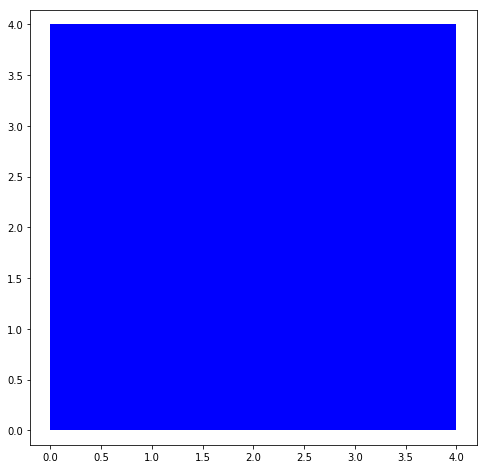

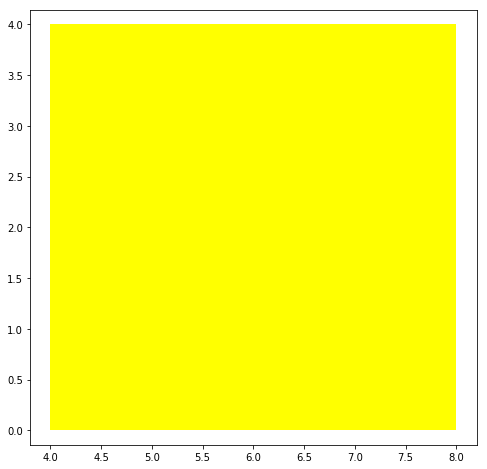

In [222]:
l1 = [(0, 0), (0, 4), (4, 4), (4, 0)]
l2 = [(4, 0), (4, 4), (8, 4), (8, 0)]
sq1 = Polygon(l1)
sq2 = Polygon(l2)

print(sq1.intersects(sq2))
print(sq1.crosses(sq2))
print(sq1.touches(sq2))

print(sq1.equals(sq2))


problem.print_state((l1, 'blue'))
problem.print_state((l2, 'yellow'))

In [ ]:
# Potential problems with implementation (notes to self)
# 1. When performing transformation of added shape, it may be updating the vertices, but you don't update vertex2, vertex2_prev, and vertex2_next!!
# 2. Are you performing the rotation about the correct vertex (v1 = v2)? If not it will just rotate about it's center or something 
# 3. When combining vertices, you are not removing ones that are completely surrounded by gemotry, and thus useless
# 4. Checking and defining of goal state still not fully correct, mess around with Shapely's .equals more, might be a way to make it work